In [ ]:
# TODO: Imports

In [66]:
joined = pd.concat(zscores.values())
# joined_ctrl = pd.concat(zscores_ctrl.values())

In [12]:
# https://github.com/arvkevi/kneed
# https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python
from kneed import KneeLocator

In [13]:
rng = np.arange(0, 1.001, 0.01)
qry_sqr = lambda r: f'ALL_map >={r} or ALL_raw >={r}'
qry_crc = lambda r: f'ALL_map * ALL_map + ALL_raw * ALL_raw >={np.power(r,2)}'

In [76]:
qry = qry_crc

precentage_overall = [joined.query(qry(r)).shape[0]/joined['ALL_map'].shape[0] for r in rng]
precentage_above = [joined.query(f'({qry(r)}) and ALL_map>ALL_raw').shape[0]/joined.query(qry(r)).shape[0] if joined.query(qry(r)).shape[0] else 1. for r in rng]

100.00% of the wells above the elbow point of 0.00
3.98% of them above y=x
95.76% of them on y=x
0.26% of them below y=x


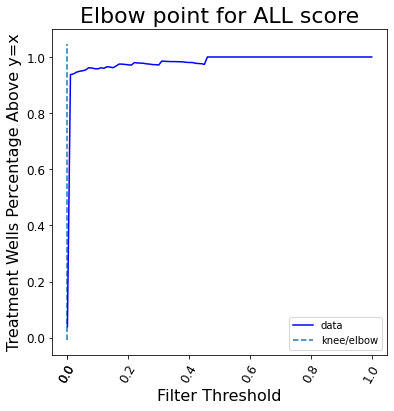

In [79]:
kneedle = KneeLocator(rng, precentage_above, curve='convex', direction='decreasing')

print(f"{100*joined.query(qry(kneedle.elbow)).shape[0]/joined['ALL_map'].shape[0]:.2f}% of the wells above the elbow point of {kneedle.elbow:.2f}")
print(f"{100*joined.query(f'({qry(kneedle.elbow)}) and ALL_map>ALL_raw').shape[0]/joined.query(qry(kneedle.elbow)).shape[0]:.2f}% of them above y=x")
print(f"{100*joined.query(f'({qry(kneedle.elbow)}) and ALL_map==ALL_raw').shape[0]/joined.query(qry(kneedle.elbow)).shape[0]:.2f}% of them on y=x")
print(f"{100*joined.query(f'({qry(kneedle.elbow)}) and ALL_map<ALL_raw').shape[0]/joined.query(qry(kneedle.elbow)).shape[0]:.2f}% of them below y=x")

kneedle.plot_knee()
_ = plt.xlabel('Filter Threshold', fontsize=16)
_ = plt.ylabel('Treatment Wells Percentage Above y=x', fontsize=16)
_ = plt.xticks(list(plt.xticks()[0][1:-1]) + [kneedle.elbow], rotation=60, fontsize=12)
_ = plt.yticks(list(plt.yticks()[0][1:-1]), fontsize=12)
_ = plt.title('Elbow point for ALL score', fontsize=22)
# _ = plt.yscale('log')
# _ = plt.xscale('log')

<ipython-input-78-2c9d8f66a8d9>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels([f'{t:.1f}'for t in ax.get_xticks()], rotation=60, fontsize=12)
<ipython-input-78-2c9d8f66a8d9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels([f'{t:.1f}'for t in ax.get_yticks()], fontsize=12)


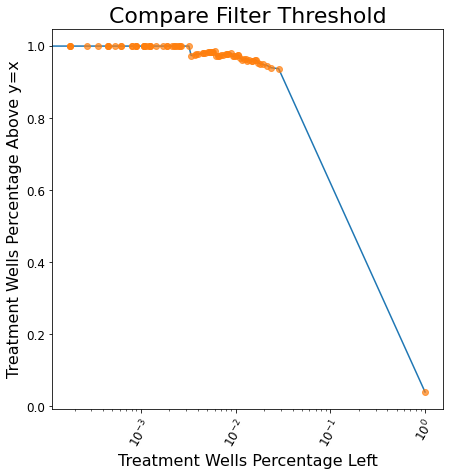

In [78]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.plot(precentage_overall, precentage_above)
_ = ax.plot(precentage_overall, precentage_above , 'o', alpha=0.7)
# _ = ax.set_xlim(1.05, -0.05)
# _ = ax.set_ylim(-0.05, 1.05)
_ = ax.set_title('Compare Filter Threshold', fontsize=22)
_ = ax.set_xlabel('Treatment Wells Percentage Left', fontsize=16)
_ = ax.set_ylabel('Treatment Wells Percentage Above y=x', fontsize=16)

_ = ax.set_xticklabels([f'{t:.1f}'for t in ax.get_xticks()], rotation=60, fontsize=12)
_ = ax.set_yticklabels([f'{t:.1f}'for t in ax.get_yticks()], fontsize=12)

_ = ax.set_xscale('log')
# _ = ax.set_yscale('log')

6.46% of the wells above the elbow point of 0.04
71.92% of them above y=x
28.08% of them below y=x


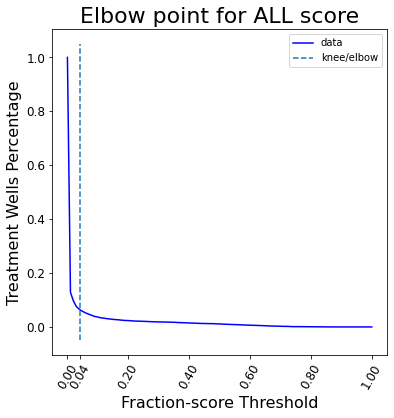

In [39]:
kneedle = KneeLocator(rng, cnt, curve='convex', direction='decreasing')

print(f"{100*joined.query(qry(kneedle.elbow)).shape[0]/joined['ALL_map'].shape[0]:.2f}% of the wells above the elbow point of {kneedle.elbow:.2f}")
print(f"{100*joined.query(f'({qry(kneedle.elbow)}) and ALL_map>ALL_raw').shape[0]/joined.query(qry(kneedle.elbow)).shape[0]:.2f}% of them above y=x")
print(f"{100*joined.query(f'({qry(kneedle.elbow)}) and ALL_map<=ALL_raw').shape[0]/joined.query(qry(kneedle.elbow)).shape[0]:.2f}% of them below y=x")

kneedle.plot_knee()
_ = plt.xlabel('Fraction-score Threshold', fontsize=16)
_ = plt.ylabel('Treatment Wells Percentage', fontsize=16)
_ = plt.xticks(list(plt.xticks()[0][1:-1]) + [kneedle.elbow], rotation=60, fontsize=12)
_ = plt.yticks(list(plt.yticks()[0][1:-1]), fontsize=12)
_ = plt.title('Elbow point for ALL score', fontsize=22)
# _ = plt.yscale('log')
# _ = plt.xscale('log')

In [114]:
rng = np.arange(0, 1.001, 0.01)
cnt = [joined_ctrl.query(f'ALL_map >={r} or ALL_raw >={r}').shape[0]/joined_ctrl['ALL_map'].shape[0] for r in rng]

1.61% of the wells above the elbow point of 0.04


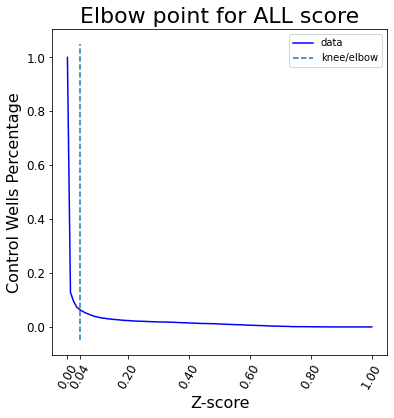

In [131]:
kneedle = KneeLocator(rng, cnt, curve='convex', direction='decreasing')

print(f"{100*joined_ctrl.query(f'ALL_map >={kneedle.elbow} or ALL_raw >={kneedle.elbow}').shape[0]/joined_ctrl['ALL_map'].shape[0]:.2f}% of the wells above the elbow point of {kneedle.elbow:.2f}")

kneedle.plot_knee()
_ = plt.xlabel('Z-score', fontsize=16)
_ = plt.ylabel('Control Wells Percentage', fontsize=16)
_ = plt.xticks(list(plt.xticks()[0][1:-1]) + [kneedle.elbow], rotation=60, fontsize=12)
_ = plt.yticks(list(plt.yticks()[0][1:-1]), fontsize=12)
_ = plt.title('Elbow point for ALL score', fontsize=22)